# WELCOME!

Welcome to "***Tree Types Prediction Project***". This is the second medium project of ***Machine Learning*** course.

In this project, you must perform EDA processes for implementing predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering using SQLite local database. 

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement KNN Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Implement SVM Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

In [3]:
from scipy import stats

#### *ii. Load Dataset*

In [4]:
tree = pd.read_csv('covtype.csv')

In [5]:
tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [13]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Elevation                           int64
 1   Aspect                              int64
 2   Slope                               int64
 3   Horizontal_Distance_To_Hydrology    int64
 4   Vertical_Distance_To_Hydrology      int64
 5   Horizontal_Distance_To_Roadways     int64
 6   Hillshade_9am                       int64
 7   Hillshade_Noon                      int64
 8   Hillshade_3pm                       int64
 9   Horizontal_Distance_To_Fire_Points  int64
 10  Wilderness_Area1                    int64
 11  Wilderness_Area2                    int64
 12  Wilderness_Area3                    int64
 13  Wilderness_Area4                    int64
 14  Soil_Type1                          int64
 15  Soil_Type2                          int64
 16  Soil_Type3                          in

In [14]:
tree.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [7]:
tree.shape

(581012, 55)

In [8]:
tree.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

In [20]:
for col in tree.columns:
    print("Column", col, "has", tree[col].nunique(), "unique values")

Column Elevation has 1978 unique values
Column Aspect has 361 unique values
Column Slope has 67 unique values
Column Horizontal_Distance_To_Hydrology has 551 unique values
Column Vertical_Distance_To_Hydrology has 700 unique values
Column Horizontal_Distance_To_Roadways has 5785 unique values
Column Hillshade_9am has 207 unique values
Column Hillshade_Noon has 185 unique values
Column Hillshade_3pm has 255 unique values
Column Horizontal_Distance_To_Fire_Points has 5827 unique values
Column Wilderness_Area1 has 2 unique values
Column Wilderness_Area2 has 2 unique values
Column Wilderness_Area3 has 2 unique values
Column Wilderness_Area4 has 2 unique values
Column Soil_Type1 has 2 unique values
Column Soil_Type2 has 2 unique values
Column Soil_Type3 has 2 unique values
Column Soil_Type4 has 2 unique values
Column Soil_Type5 has 2 unique values
Column Soil_Type6 has 2 unique values
Column Soil_Type7 has 2 unique values
Column Soil_Type8 has 2 unique values
Column Soil_Type9 has 2 unique 

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection in *EDA Project (Outo Scout)* are given below.

In [24]:
numeric = []

for col in tree.columns:
    if tree[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [25]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

In [26]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [31]:
tree['Cover_Type'].value_counts(
)

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

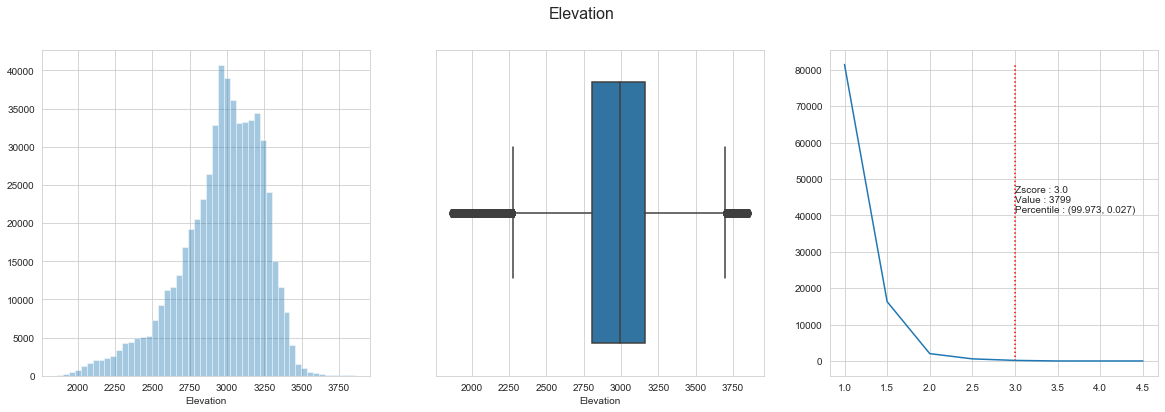

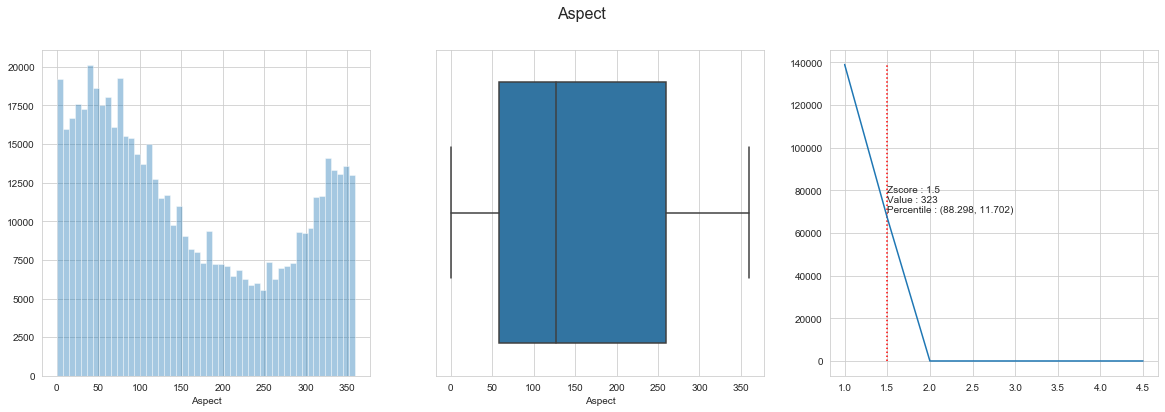

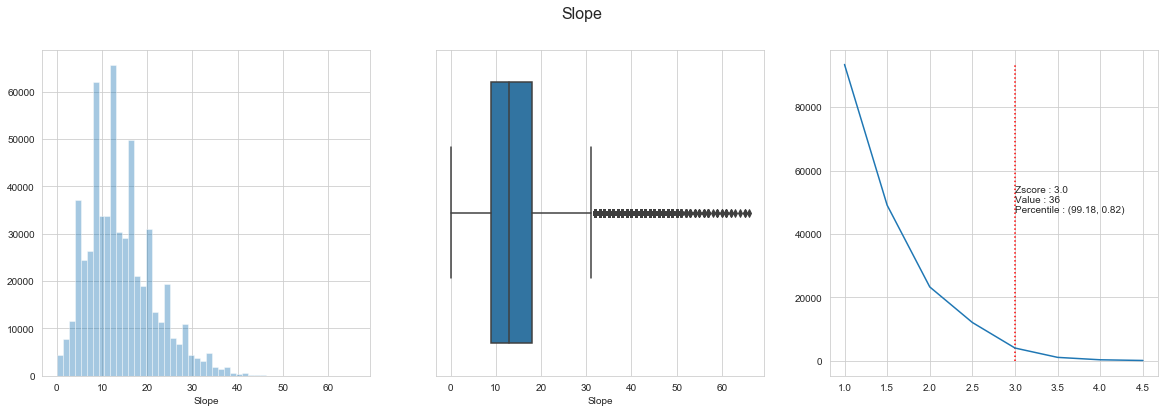

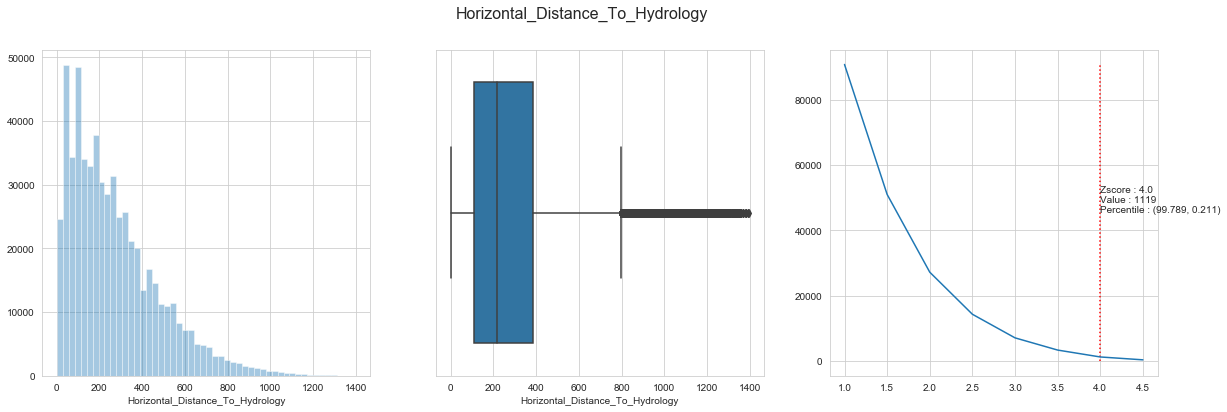

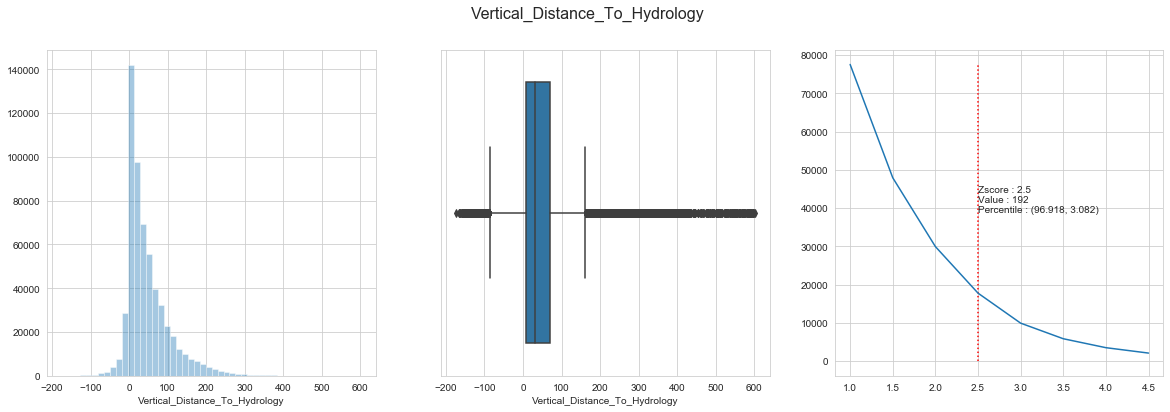

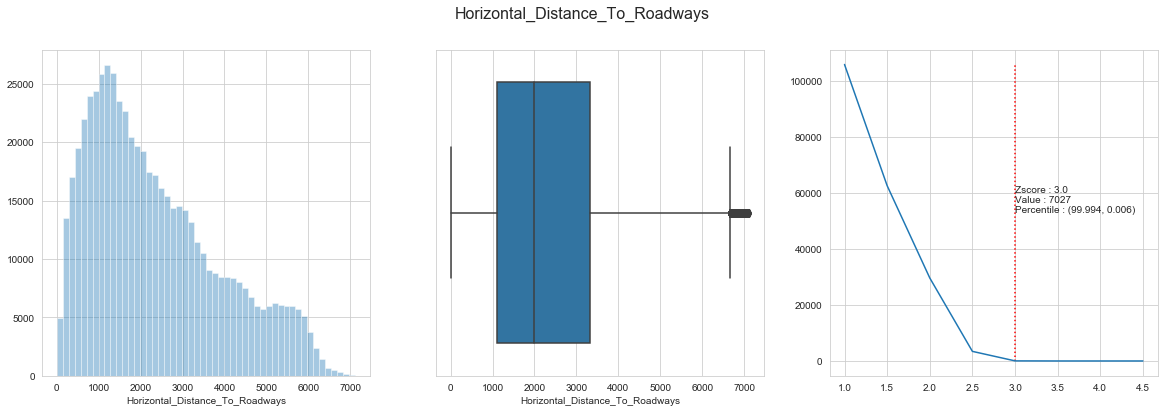

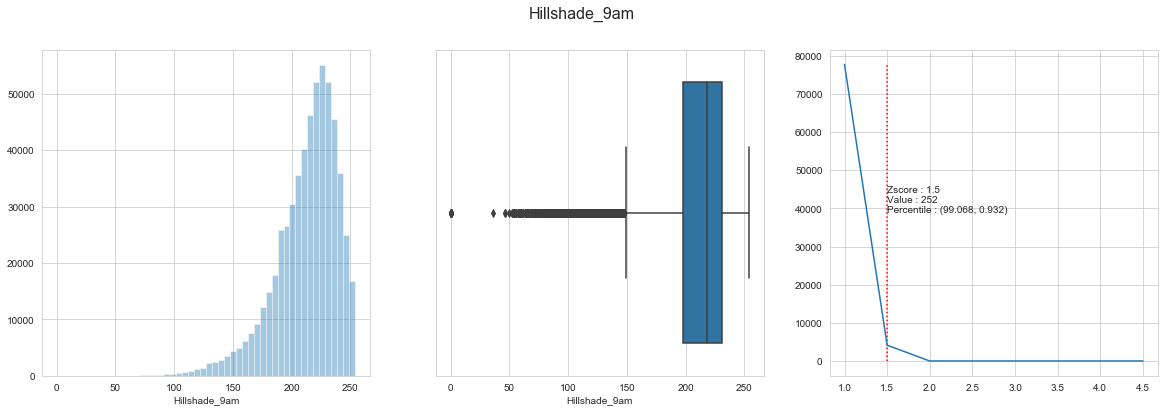

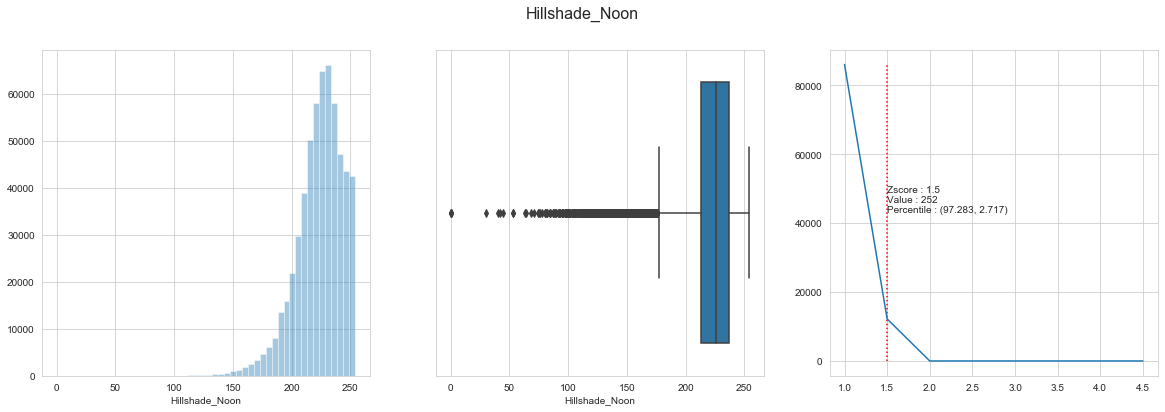

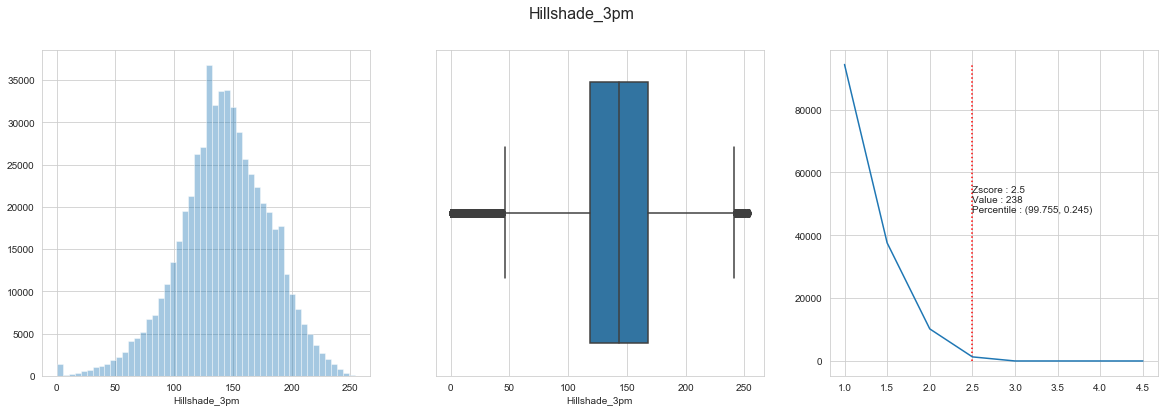

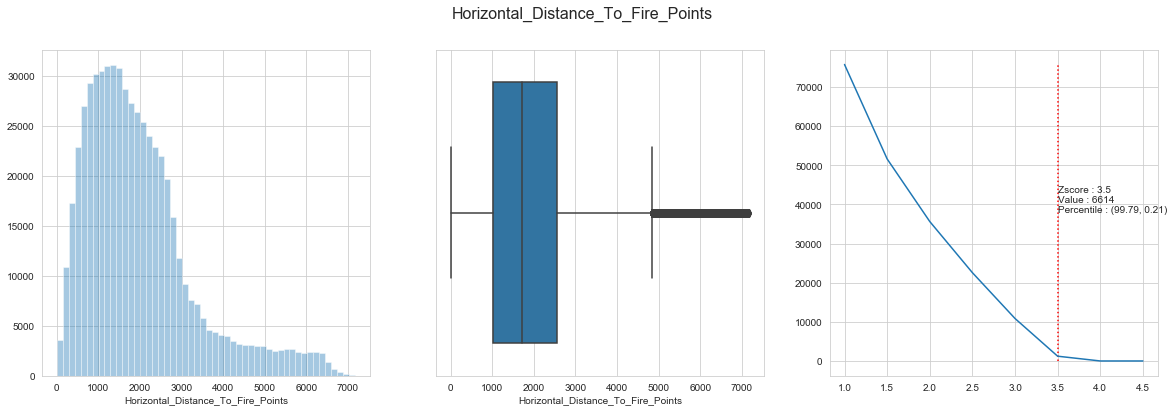

In [32]:
sns.set_style('whitegrid')
for col in numeric :
    outlier_inspect(tree, col )

#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

In [34]:

def detect_outliers(df, col_name):
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [35]:
for col in numeric:
    if detect_outliers(tree, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(tree, col)[2], col))

There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points


In [36]:
tree1 = tree[(tree['Slope'] > detect_outliers(tree, 'Slope')[0]) &
              (tree['Slope'] < detect_outliers(tree, 'Slope')[1])]
tree1.shape

(580640, 55)

In [37]:

tree1 = tree1[(tree1['Horizontal_Distance_To_Fire_Points'] > detect_outliers(tree1, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (tree1['Horizontal_Distance_To_Fire_Points'] < detect_outliers(tree1, 'Horizontal_Distance_To_Fire_Points')[1])]

tree1.shape

(580630, 55)

In [38]:
tree1 = tree1[(tree1['Horizontal_Distance_To_Hydrology'] > detect_outliers(tree1, 'Horizontal_Distance_To_Hydrology')[0]) &
              (tree1['Horizontal_Distance_To_Hydrology'] < detect_outliers(tree1, 'Horizontal_Distance_To_Hydrology')[1])]

tree1.shape

(580216, 55)

In [39]:
tree1 = tree1[(tree1['Vertical_Distance_To_Hydrology'] > detect_outliers(tree1, 'Vertical_Distance_To_Hydrology')[0]) &
              (tree1['Vertical_Distance_To_Hydrology'] < detect_outliers(tree1, 'Vertical_Distance_To_Hydrology')[1])]

tree1.shape

(574967, 55)

In [40]:

len(tree) - len(tree1)

6045

In [42]:
tree1 = tree1.reset_index(drop=True)

In [43]:
tree1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [44]:

for i in range(1,8) :
    print("the shape of the value of", i, tree1[tree1["Cover_Type"] == i].shape)

the shape of the value of 1 (210004, 55)
the shape of the value of 2 (280193, 55)
the shape of the value of 3 (35546, 55)
the shape of the value of 4 (2741, 55)
the shape of the value of 5 (9453, 55)
the shape of the value of 6 (17345, 55)
the shape of the value of 7 (19685, 55)


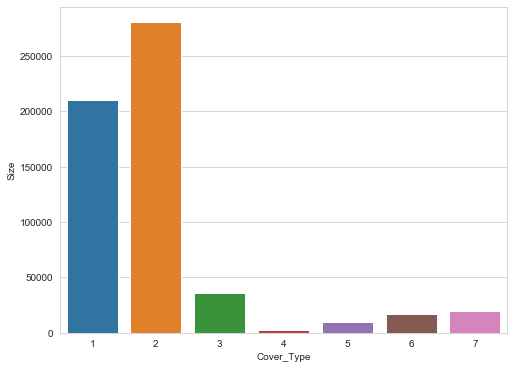

In [45]:
class_tree = tree1.groupby('Cover_Type').size()
class_label = pd.DataFrame(class_tree,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size', data = class_label)

In [46]:
for i, number in enumerate(class_tree):
    percent = (number/class_tree.sum())
    print('Cover_Type', class_tree.index[i])
    print('%.2f'% percent)

Cover_Type 1
0.37
Cover_Type 2
0.49
Cover_Type 3
0.06
Cover_Type 4
0.00
Cover_Type 5
0.02
Cover_Type 6
0.03
Cover_Type 7
0.03


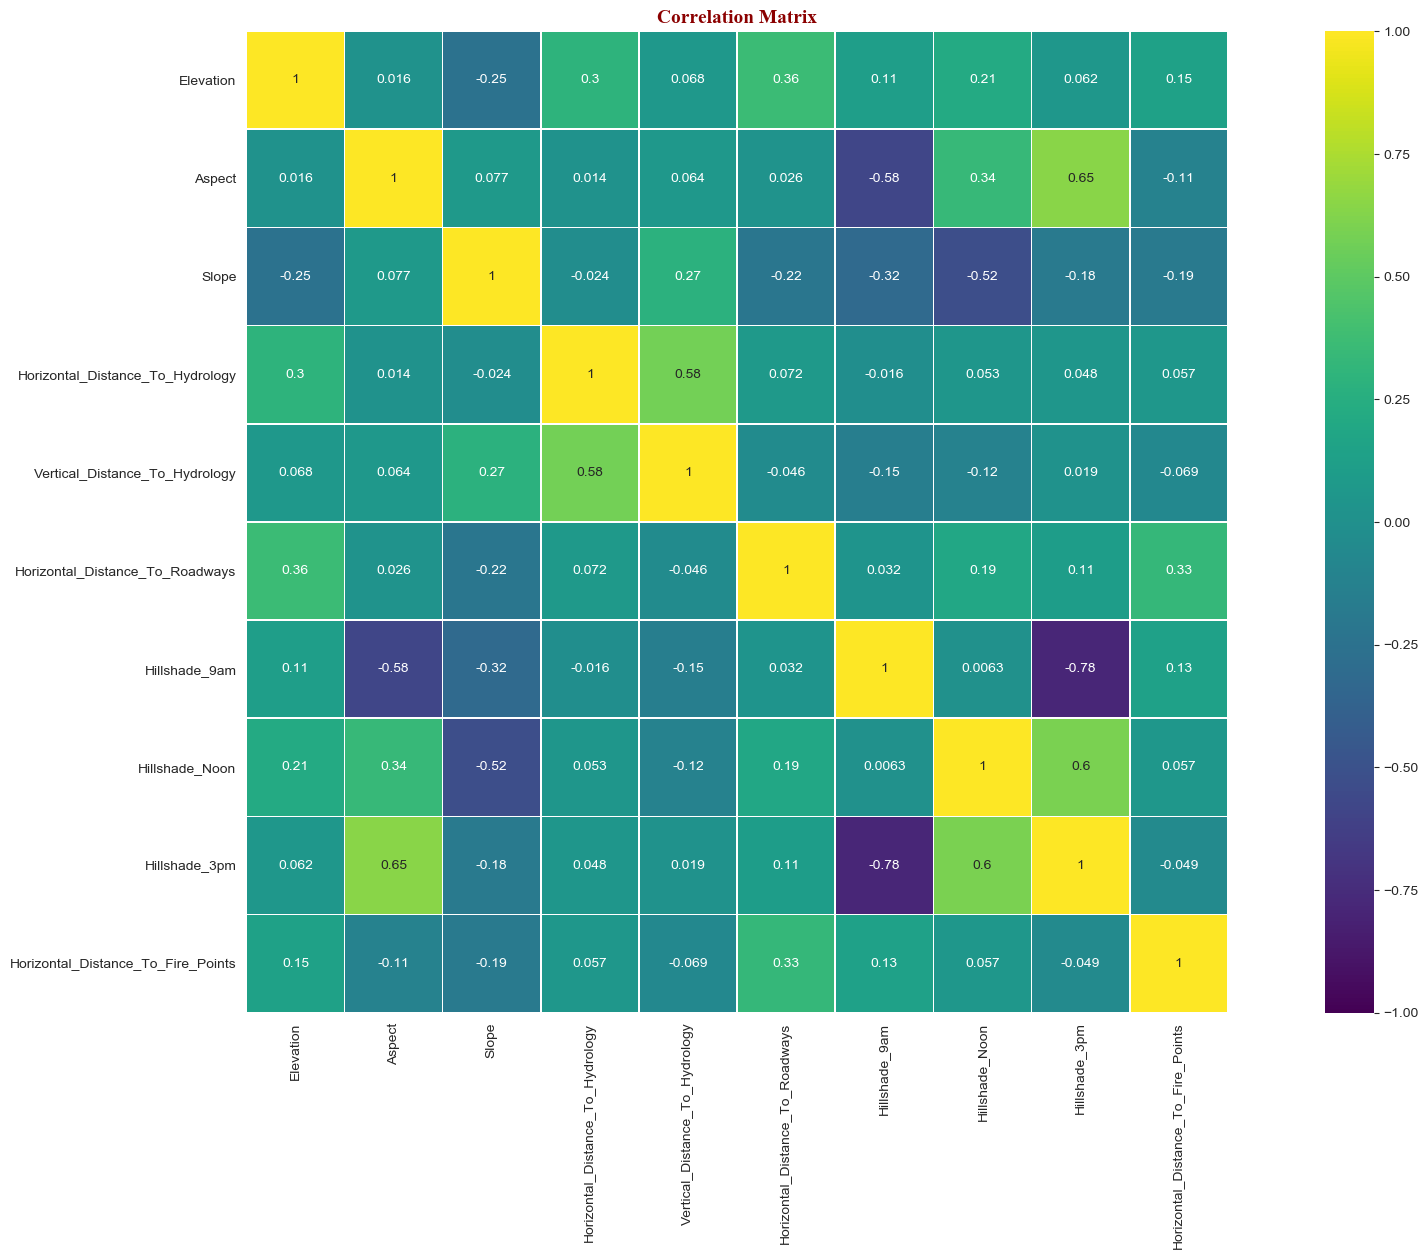

In [52]:
corr_matrix = tree1[numeric].corr()

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)

plt.show()

In [53]:
tree1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574967 entries, 0 to 574966
Data columns (total 55 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Elevation                           int64
 1   Aspect                              int64
 2   Slope                               int64
 3   Horizontal_Distance_To_Hydrology    int64
 4   Vertical_Distance_To_Hydrology      int64
 5   Horizontal_Distance_To_Roadways     int64
 6   Hillshade_9am                       int64
 7   Hillshade_Noon                      int64
 8   Hillshade_3pm                       int64
 9   Horizontal_Distance_To_Fire_Points  int64
 10  Wilderness_Area1                    int64
 11  Wilderness_Area2                    int64
 12  Wilderness_Area3                    int64
 13  Wilderness_Area4                    int64
 14  Soil_Type1                          int64
 15  Soil_Type2                          int64
 16  Soil_Type3                          in

In [54]:
tree1.to_csv("covtype_EDA.csv", index = False)

## 3. Feature Engineering with *sqlite3* Library

Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

In [55]:
import sqlite3

In [56]:

# Creation of the connection and importing dataframe into database.
with sqlite3.connect("tree_database.db") as cnnct:
    tree1.to_sql("covtype2", cnnct, if_exists = "replace")

In [57]:
query1 = """SELECT *,
(Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance,
(Horizontal_Distance_To_Hydrology + Horizontal_Distance_To_Roadways)/2 as Average_Dist_Road_Hydro, (Elevation + Vertical_Distance_To_Hydrology) /2 as Average_Elevation_Hydro
FROM covtype2;"""

In [58]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3,
Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6,
Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type16, Soil_Type17, 
Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type22, Soil_Type23, Soil_Type24, 
Soil_Type26, Soil_Type27, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, 
Soil_Type34, Soil_Type35, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type,
Square_Hypo_Distance, Average_Dist_Road_Hydro, Average_Elevation_Hydro
FROM covtype2;"""

In [59]:
with sqlite3.connect("tree_database.db") as cnnct:
    df1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting to df1
    df1.to_sql("covtype2", cnnct, if_exists = "replace")  # importing again to dropping columns
    df2 = pd.read_sql_query(query2, cnnct)  # exporting table to df2

In [60]:
df2.to_csv("covtype2.csv", index = False)


***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100


### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [78]:
df = pd.read_csv("covtype2.csv")

In [79]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,2596,51,3,510,221,232,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,66564,384,1298
1,2590,56,2,390,220,235,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,44980,301,1292
2,2804,139,9,3180,234,238,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,76049,1724,1434
3,2785,155,18,3090,238,238,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,72488,1666,1451
4,2595,45,2,391,220,234,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,23410,272,1297


In [80]:
X = df.drop("Cover_Type", axis = 1)


In [81]:
y = df["Cover_Type"]


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


### Implement KNeighborsClassifer

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

In [104]:
neighbors = np.arange(1, 7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

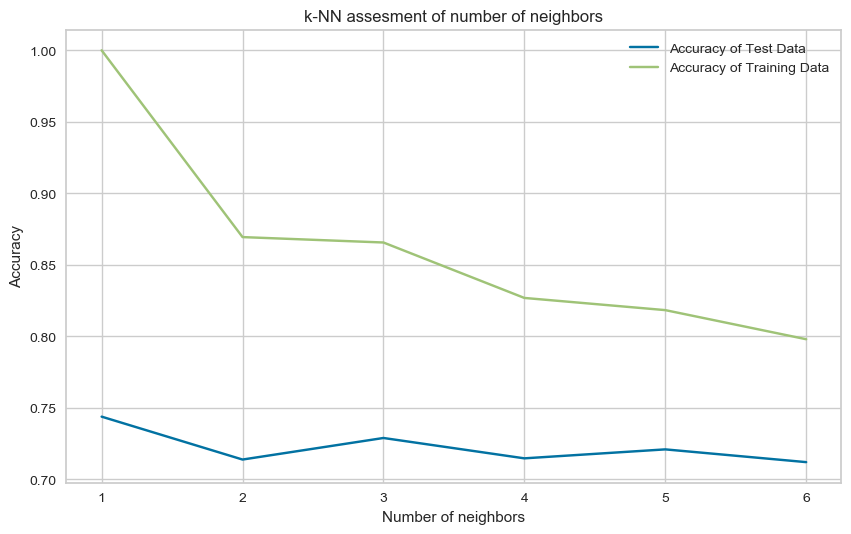

In [105]:
plt.figure(figsize=(10,6))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [106]:
knn5 = KNeighborsClassifier(n_neighbors = 5)

In [107]:
knn5.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [108]:
y_pred = knn5.predict(X_test)


In [109]:
knn5_f1 = f1_score(y_test, y_pred, average='macro')
knn5_f1

0.5703464819893874

In [110]:
knn_accuracy = knn5.score(X_test,y_test)

In [111]:

knn_accuracy

0.7210115310364019

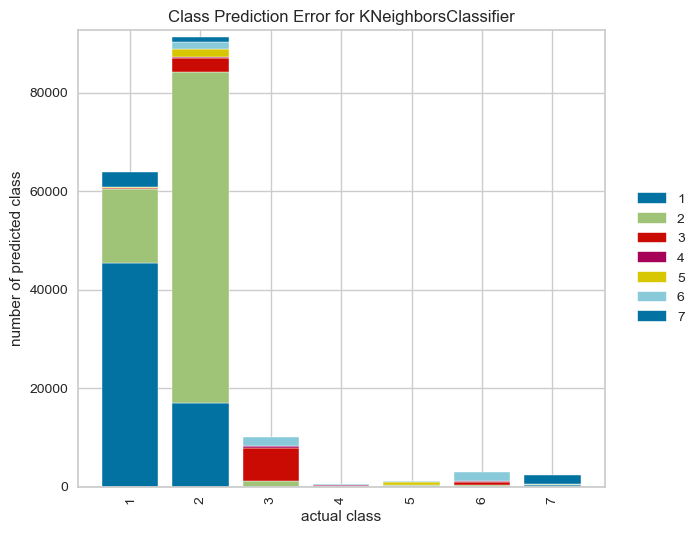

In [112]:
visualizer = ClassPredictionError(knn5)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

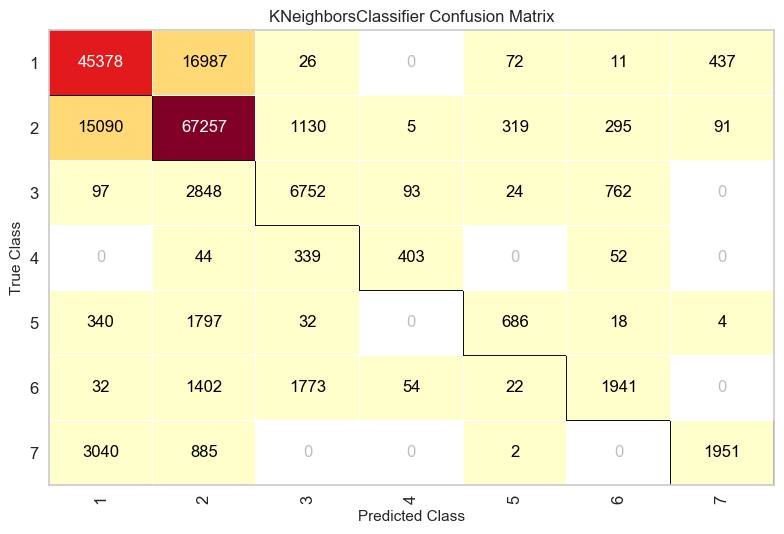

In [113]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(knn5)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

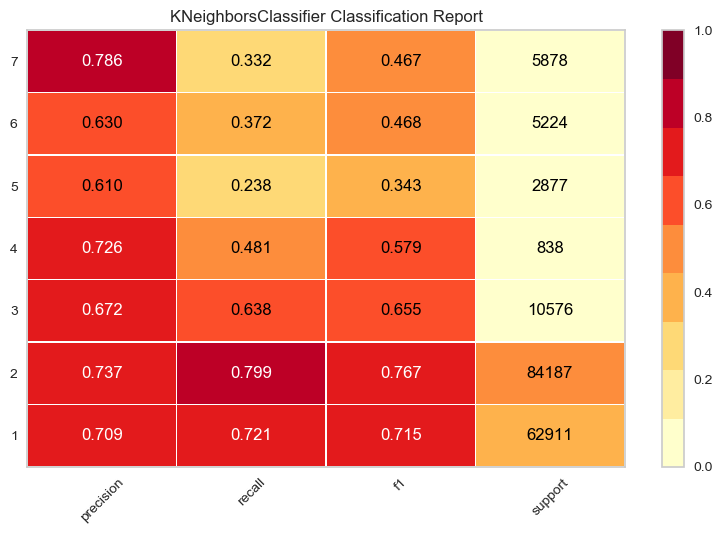

In [114]:
visualizer = ClassificationReport(knn5, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [115]:

modelTree = DecisionTreeClassifier()

In [116]:
modelTree.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [117]:

pred = modelTree.predict(X_test)

In [118]:
tree_f1 = f1_score(y_test, pred, average='macro')
tree_f1

0.8926903063463206

In [119]:
tree_accuracy = accuracy_score(pred, y_test)

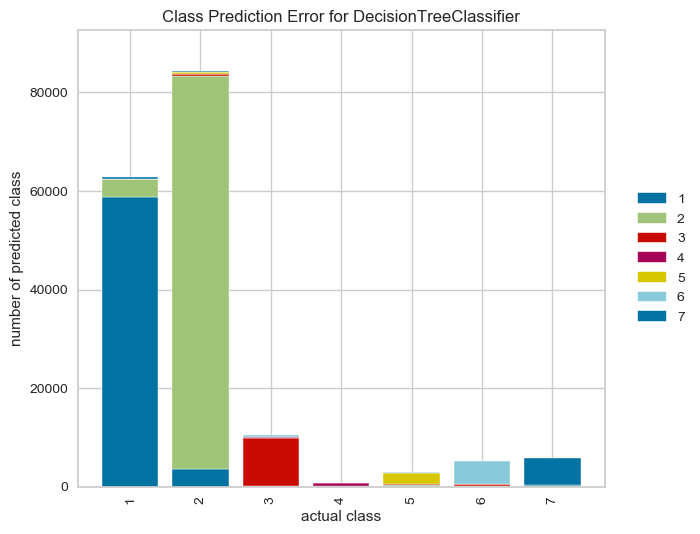

In [120]:
visualizer = ClassPredictionError(modelTree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

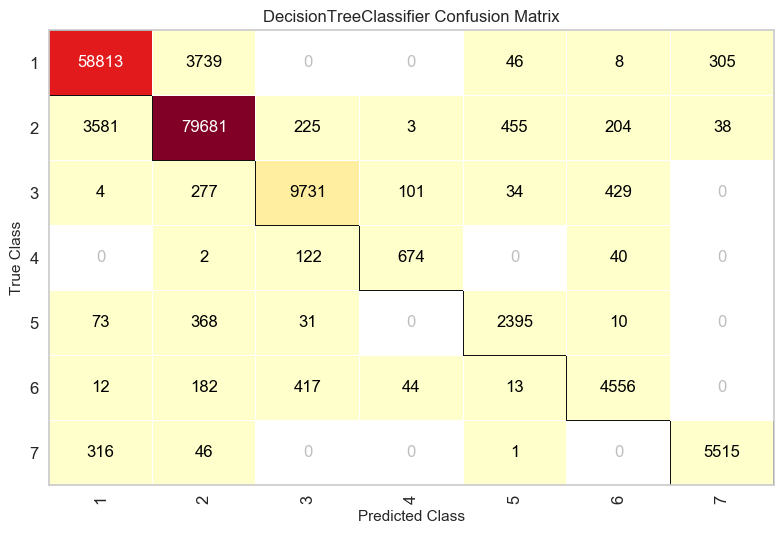

In [121]:

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(modelTree)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

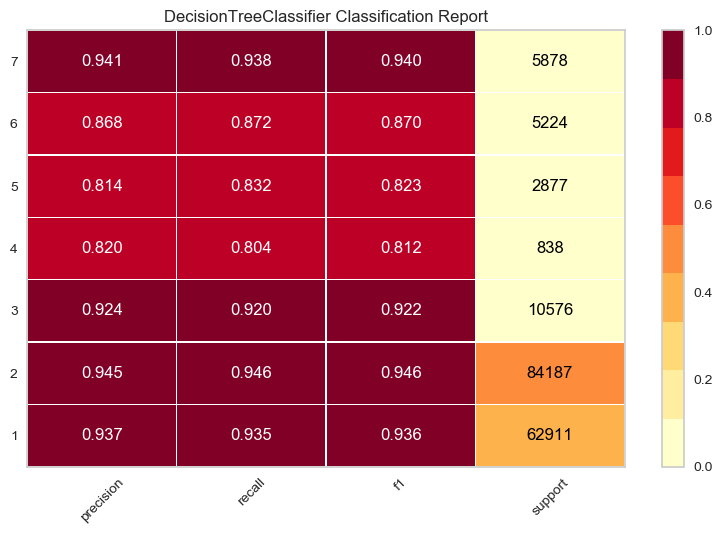

In [123]:
visualizer = ClassificationReport(modelTree, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [96]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
rfc_pred = rfc.predict(X_test)

In [100]:

rfc_f1 = f1_score(y_test, rfc_pred, average='macro')
rfc_f1

0.9363534675203944

In [101]:

rf_accuracy = rfc.score(X_test,y_test)

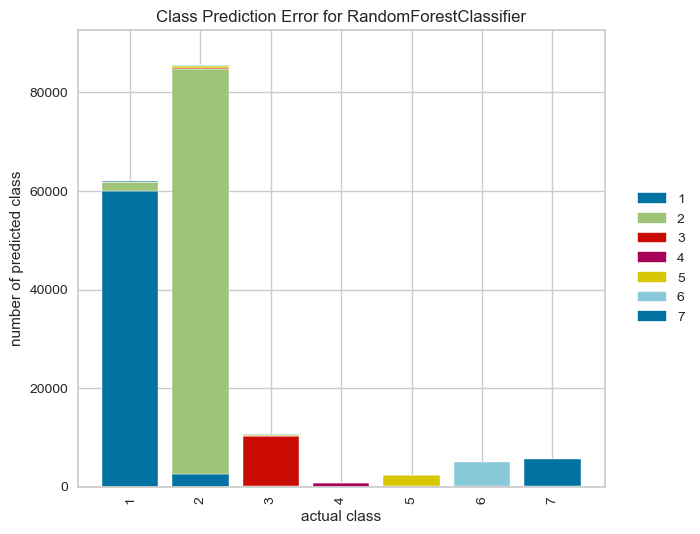

In [102]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

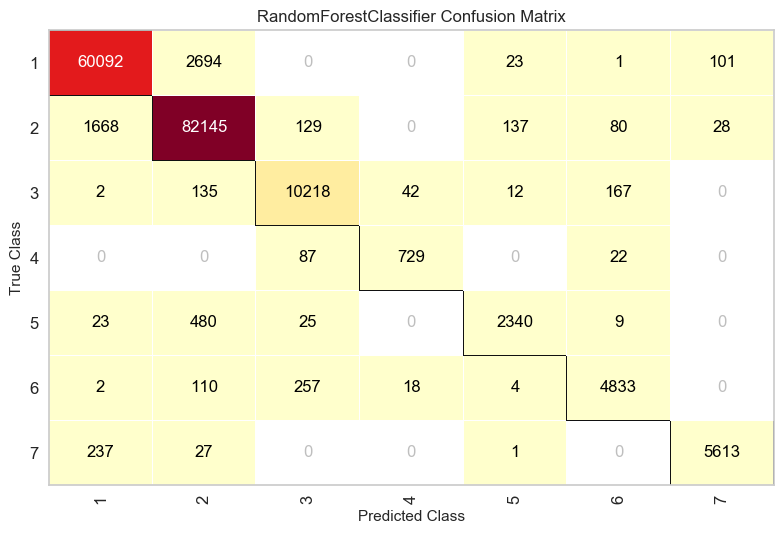

In [103]:

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rfc)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

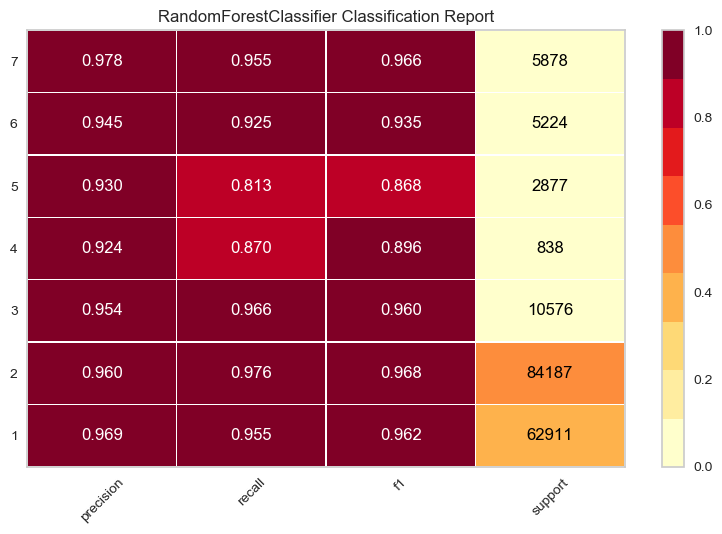

In [122]:
visualizer = ClassificationReport(rfc, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
y_predicted = xgb_classifier.predict(X_test)


In [89]:
y_predicted

array([7, 3, 3, ..., 1, 3, 2], dtype=int64)

In [90]:
xgb_accuracy = accuracy_score(y_test, y_predicted)

In [91]:
xgb_f1 = f1_score(y_test, y_predicted, average='macro')
xgb_f1

0.8579557215406378

In [92]:
xgb_accuracy

0.8714599602298091

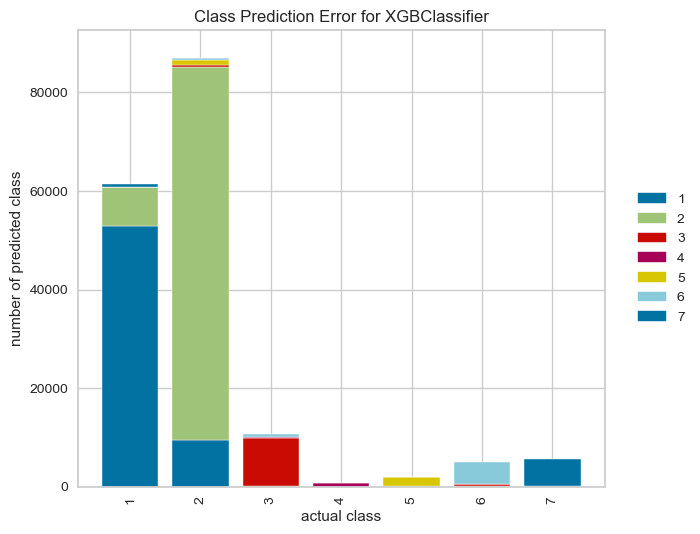

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

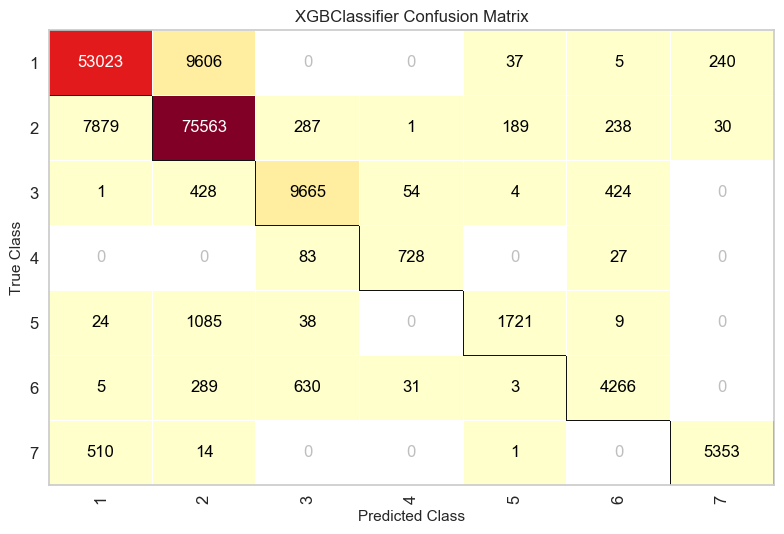

In [94]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb_classifier)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

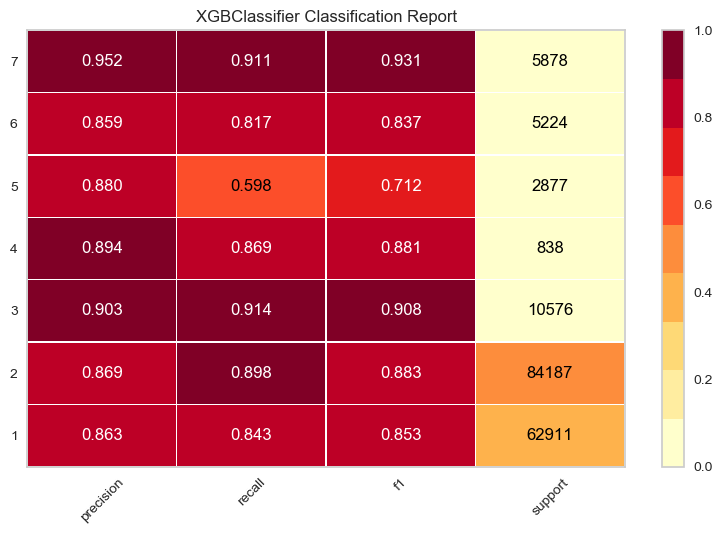

In [95]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

visualizer = ClassificationReport(xgb_classifier, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [ ]:
#modelSVM = LinearSVC()

In [ ]:

#modelSVM.fit(X_train , y_train)

In [ ]:

#pred = modelSVM.predict(X_test)

In [ ]:
#SVM_accuracy = accuracy_score(pred, y_test)
#SVM_accuracy

In [ ]:
'''
df['Square_Hypo_Distance'] = np.sqrt(df['Square_Hypo_Distance'])
df1 = df.drop(['Average_Dist_Road_Hydro','Average_Elevation_Hydro'], axis = 1)
X1 = df1.drop("Cover_Type", axis = 1)
y1 = df1["Cover_Type"]

'''

In [ ]:
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [ ]:
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [ ]:

#modelSVM1.fit(X1_train , y1_train)


In [ ]:

#pred1 = modelSVM1.predict(X1_test)

In [ ]:

#SVM_accuracy1 = accuracy_score(pred1, y1_test)

In [ ]:
#SVM_accuracy1

In [ ]:
'''
visualizer = ClassPredictionError(modelSVM1)

# Fit the training data to the visualizer
visualizer.fit(X1_train, y1_train)

# Evaluate the model on the test data
visualizer.score(X1_test, y1_test)

# Draw visualization
visualizer.show()

'''

In [ ]:
'''
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(modelSVM1)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X1_train, y1_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X1_test, y1_test)

cm.show()

'''

In [ ]:
'''
visualizer = ClassificationReport(modelSVM1, support=True)

visualizer.fit(X1_train, y1_train)        # Fit the visualizer and the model
visualizer.score(X1_test, y1_test)        # Evaluate the model on the test data
visualizer.show() 

'''

### Compare The Models

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

Text(0.5, 1.0, 'Accuracy Score of Different Models')

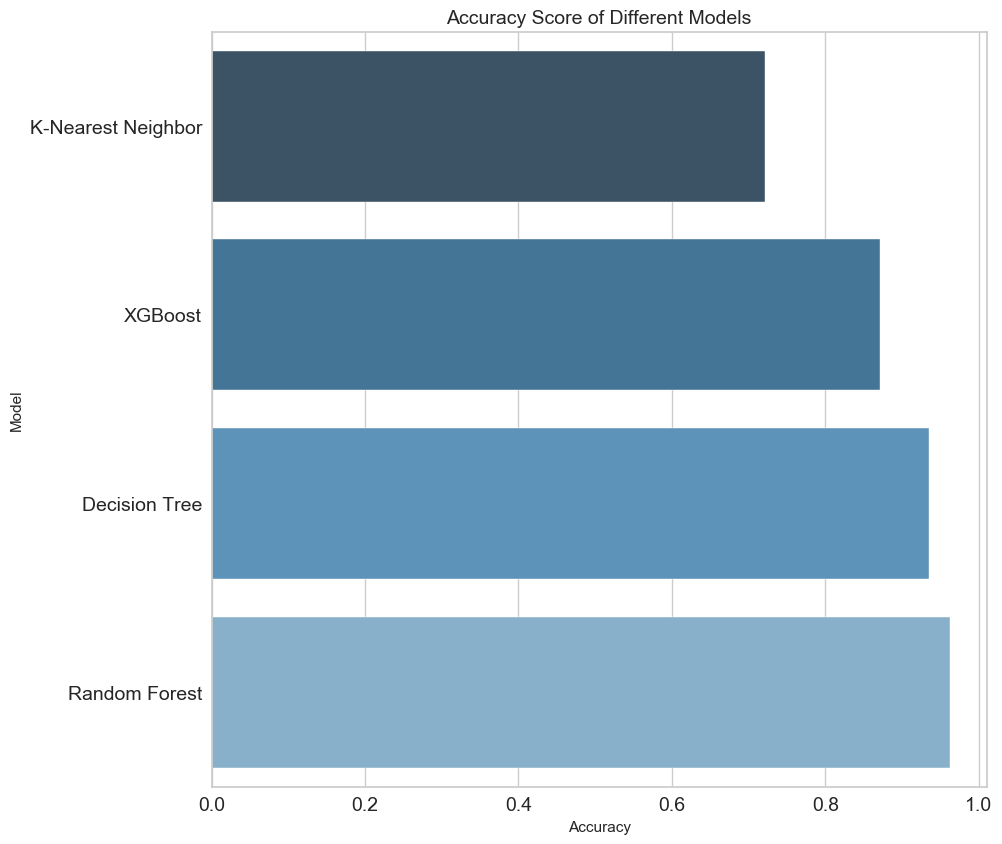

In [124]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [knn_accuracy, rf_accuracy, xgb_accuracy, tree_accuracy]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

Text(0.5, 1.0, 'Accuracy Score of Different Models')

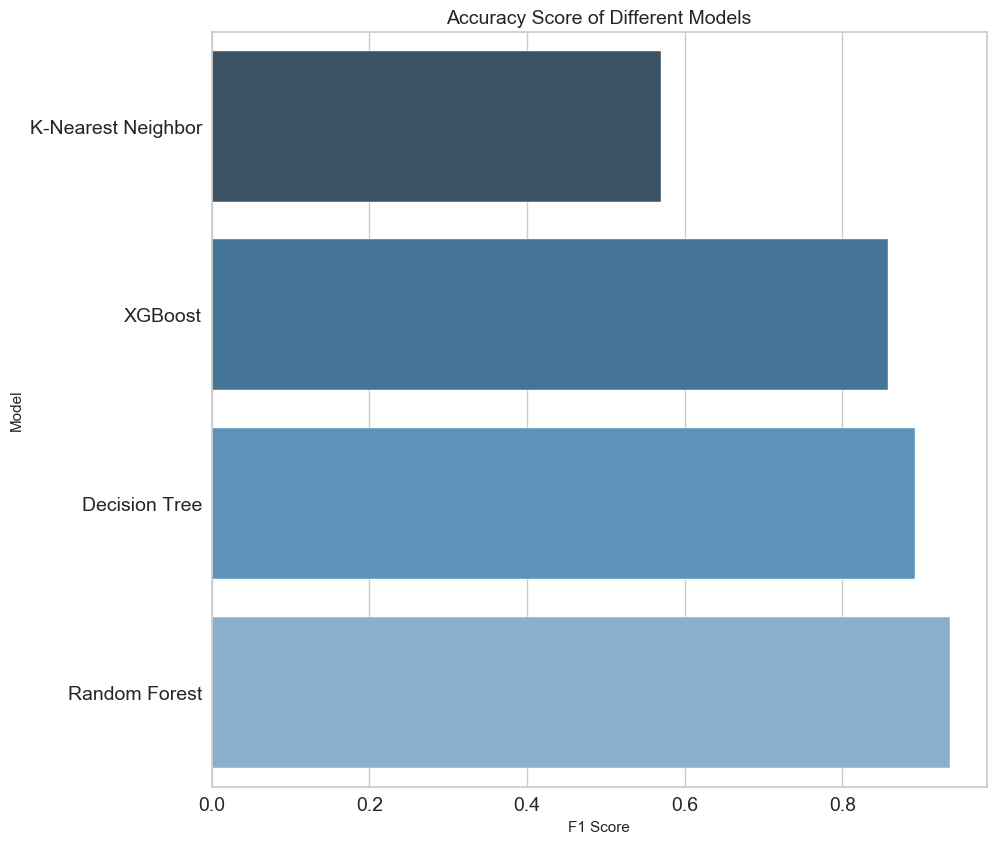

In [125]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree"],
                        "F1 Score": [knn5_f1, rfc_f1, xgb_f1, tree_f1]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)